<a href="https://colab.research.google.com/github/25Ayda/epilepticSeizureDetection/blob/main/EEGDataSeizurePredection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEG Data Seizure Predection

By: Ayda Gokturk

Date: November 1st 2023

## Problem Context

How can machine learning be used for epileptic seizure detection? Seizure detection is not only very difficult but also people are often misdiagnosed with epilepsy. Additionally, EEG data is very long and extensive and the process of understanding and finding patterns in EEG data can be very time-consuming and difficult. Machine learning can be used to make this process more efficient and aid doctors in diagnosing epilepsy faster and more accurately.

#Data Set
The dataset I will be using is EEG data that is contained in a .csv file. This data is collected from UCI Machine Learning Repository. This dataset is a pre-processed and re-structured/reshaped version of a very commonly used dataset featuring epileptic seizure detection. This dataset was accsessed through Kaggle. [EEG DataSet](https://www.kaggle.com/datasets/harunshimanto/epileptic-seizure-recognition )



# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Reading the Dataset
*   The original dataset consists of 500 individuals, each with 4097 data points for 23.5 seconds.
*   The data was divided into 23 chunks, each containing 178 data points for 1 second.
* The last column of the dataset represents the label y, which is a categorical variable with 5 possible values:
  * Recording of seizure activity
  * EEG from the area where the tumor was located
  * EEG activity from the healthy brain area
  * Eyes closed
  * Eyes open
* The authors created this version of the dataset to simplify access to the data.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Epileptic Seizure Recognition.csv to Epileptic Seizure Recognition.csv


In [ ]:
seizure_data = pd.read_csv("Epileptic Seizure Recognition.csv")
print(seizure_data.head())
og_seizure_data = pd.read_csv("Epileptic Seizure Recognition.csv")

      Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]


# Exploratory Data Analysis

In [ ]:
np.sum(seizure_data.isnull())

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [ ]:
print("Dimension of data set", seizure_data.shape)

Dimension of data set (11500, 180)


In [ ]:
len(seizure_data)

11500

## Observations from EDA
[TO DO: Insert any observations you notice from the graphs you made]

# Data Preprocessing

In [ ]:
# there are no null values
seizure_data.head

<bound method NDFrame.head of           Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   
1      X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
11495  X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  ...    15   
11496  X19.V1.354  -47  -11   28   77  141  211  246  240  193  ...   -65   
11497    X8.V1.28   14    6  -13  -16   10   26   27   -9    4  ...   -65   
11498  X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22  ...   121   
11499  X16.V1.210   29   41   57   72   74   62   54   43   31  ...   -59   

       X171  X172  X173  X174  X175  X176  X1

In [ ]:
seizure_data['y'].replace([2, 3, 4, 5], 0, inplace=True)
print(seizure_data.head)
y = seizure_data.loc[:,"y"]
len(y)

<bound method NDFrame.head of           Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   
1      X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
11495  X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  ...    15   
11496  X19.V1.354  -47  -11   28   77  141  211  246  240  193  ...   -65   
11497    X8.V1.28   14    6  -13  -16   10   26   27   -9    4  ...   -65   
11498  X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22  ...   121   
11499  X16.V1.210   29   41   57   72   74   62   54   43   31  ...   -59   

       X171  X172  X173  X174  X175  X176  X1

11500

In [ ]:
x = seizure_data.drop(['Unnamed', 'y'], axis=1)
x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train)


(8625, 178)
(2875, 178)
(8625,)
(2875,)
        X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X169  X170  \
4970   115  258  449  593  671  656  537  390  200   59  ...  -275  -351   
142    -67  -74  -84  -96 -104 -107 -109 -111 -123 -130  ...   -41   -47   
959    -75  -61  -60  -54  -53  -69  -79  -88  -88 -103  ...   -83   -89   
665     19   -4  -11  -12    2   15   29   34   29   31  ...   -42   -76   
3991   -24  -20  -15   -2    8   14   21   19   17   17  ...  -232  -223   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
7813    17    6  -10  -21  -31  -44  -52  -68  -85  -92  ...  -115   -97   
10955  -35  -22  -18  -19  -46  -64  -72  -67  -45  -28  ...  -204  -180   
905     43   70  117   78    5  -83 -152 -153 -135 -101  ...   -17   -29   
5192   -27   -1   22   42   41   26    7   -9  -19  -38  ...   -26    -8   
235    -30  -22  -11  -10   -6  -10  -11  -10  -12  -12  ...    17    19   

       X171  X172  X173  X174  X175  X176  X177

In [ ]:
#Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)

[[ 0.76280517  1.60017839  2.77502663 ... -1.7003737  -1.44709363
  -1.21226372]
 [-0.31415751 -0.35891459 -0.4317629  ... -0.33469407 -0.34598072
  -0.27587629]
 [-0.36149653 -0.28220312 -0.28736713 ... -0.17329557 -0.19834546
  -0.25775266]
 ...
 [ 0.336754    0.49081248  0.77755172 ...  0.44126026  0.61979989
   0.24970892]
 [-0.07746241  0.07184983  0.20598511 ...  0.00672584  0.02310741
   0.06243143]
 [-0.09521455 -0.0520687   0.00744092 ...  0.23640832  0.18919707
   0.14096715]]
[[ 0.22432383  0.20757013  0.19395213 ...  0.09984036  0.15843973
   0.21346166]
 [ 1.0941783   1.41135015  1.6980748  ...  4.20308687  4.99964568
   5.53576702]
 [ 0.76872255  0.77405484  0.68730436 ... -0.08638868 -0.05071021
  -0.01610429]
 ...
 [-2.02427956 -1.58039726 -0.57014219 ... -1.87418747 -2.0253317
  -2.10032148]
 [-0.11888406 -0.1523837  -0.18508679 ... -0.20433374 -0.23525428
  -0.23358782]
 [-0.07746241 -0.07567223 -0.07077346 ... -0.13604976 -0.13067931
  -0.14901089]]


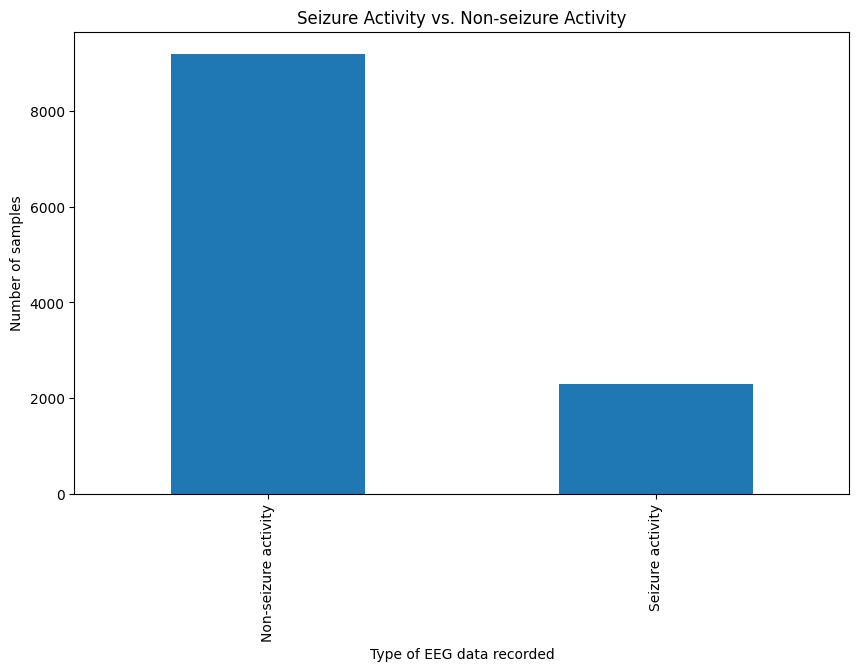

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
activityType = seizure_data['y'].value_counts()
activityType.plot.bar()
plt.xlabel('Type of EEG data recorded')
plt.ylabel('Number of samples')
plt.title('Seizure Activity vs. Non-seizure Activity')
ind = np.arange(2)
plt.xticks(ind, ('Non-seizure activity', 'Seizure activity'))
plt.show()

array([0, 1])

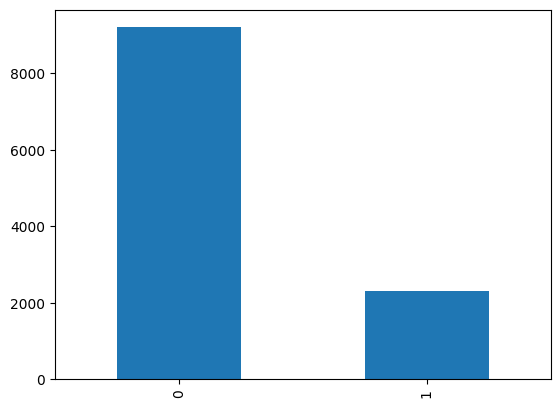

In [ ]:
activityType = seizure_data['y'].value_counts()
activityType.plot.bar()
np.unique(seizure_data['y'])

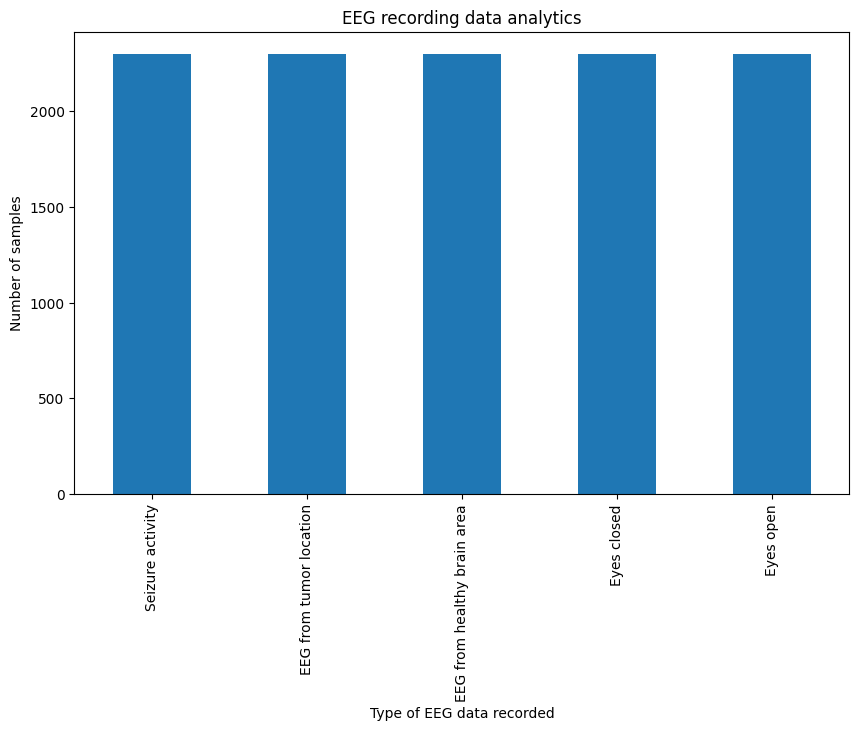

In [ ]:
plt.figure(figsize=(10,6))
activityType = og_seizure_data['y'].value_counts()
activityType.plot.bar()
plt.xlabel('Type of EEG data recorded')
plt.ylabel('Number of samples')
plt.title('EEG recording data analytics')
ind = np.arange(5)
plt.xticks(ind, ('Seizure activity', 'EEG from tumor location', 'EEG from healthy brain area', 'Eyes closed', 'Eyes open'))
plt.show()

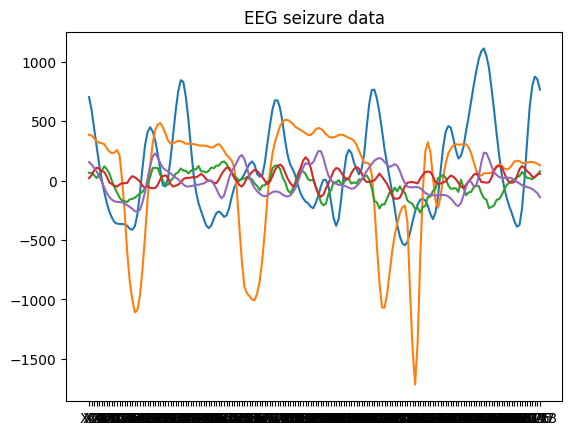

In [ ]:
from re import X
plt.title('EEG seizure data')
plt.plot(list(x.columns), x.loc[2311,:])
plt.plot(list(x.columns), x.loc[1,:])
plt.plot(list(x.columns), x.loc[9089,:])
plt.plot(list(x.columns), x.loc[8951,:])
plt.plot(list(x.columns), x.loc[1966,:])

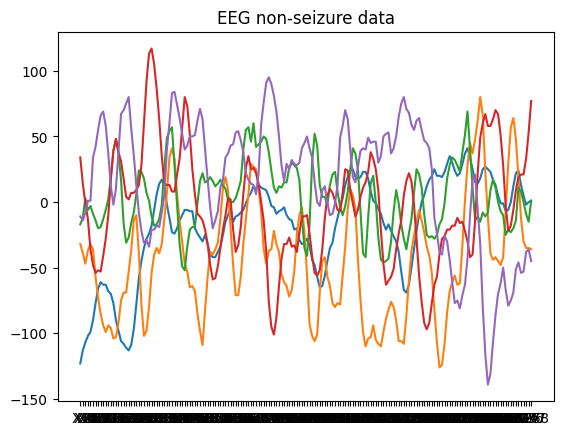

In [ ]:
plt.title('EEG non-seizure data')
plt.plot(list(x.columns), x.loc[2709,:])
plt.plot(list(x.columns), x.loc[2,:])
plt.plot(list(x.columns), x.loc[7015,:])
plt.plot(list(x.columns), x.loc[11417,:])
plt.plot(list(x.columns), x.loc[6569,:])

<ipython-input-18-fa62e4863e7f>:4: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(([0], [0]), ('non-seizure', 'seizure'))


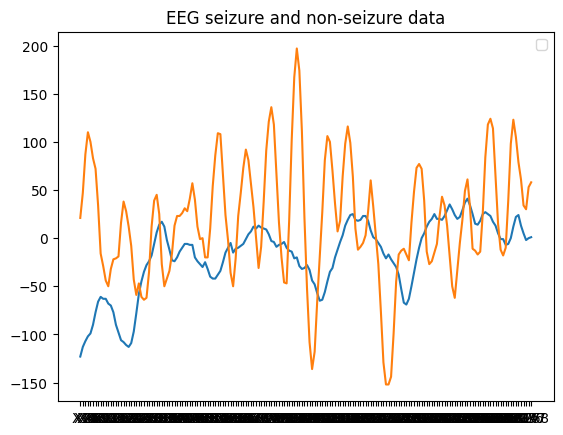

In [ ]:
plt.title('EEG seizure and non-seizure data')
plt.plot(list(x.columns), x.loc[2709,:])
plt.plot(list(x.columns), x.loc[8951,:])
plt.legend(([0], [0]), ('non-seizure', 'seizure'))

In [ ]:
seizure_data.sample(2)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
10634,X22.V1.44,-21,-13,-6,0,-11,-17,-16,5,25,...,41,52,59,61,71,80,97,127,158,0
10653,X13.V1.75,28,22,26,31,43,49,54,49,50,...,33,33,22,8,0,-20,-31,-47,-53,0


# Model Development & Evaluation



## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 0 ... 1 0 0]
accuracy: 0.6483478260869565
recall: 0.4254937163375224
precision: 0.25538793103448276
2663     0
8871     1
8684     1
2061     1
7258     0
        ..
3492     0
5959     0
10482    1
7552     0
7036     0
Name: y, Length: 2875, dtype: int64
[0 0 0 ... 1 0 0]


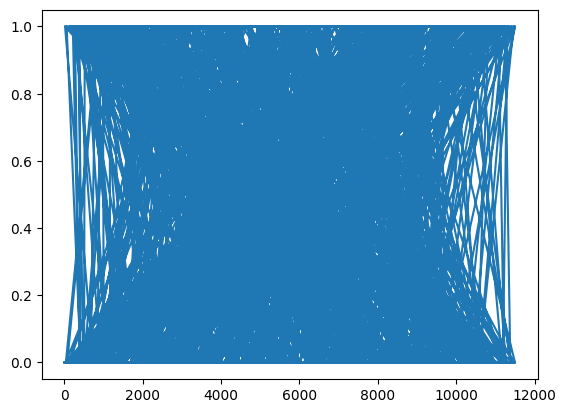

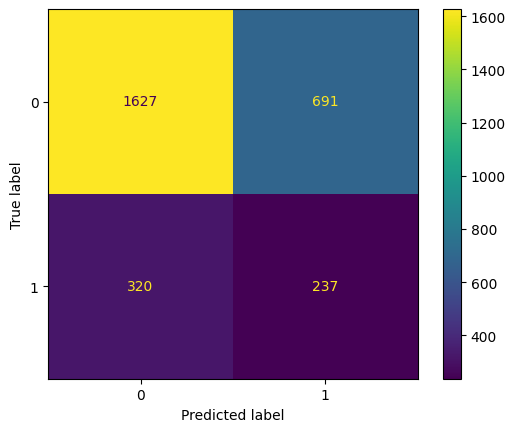

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(predictions)
print(f"accuracy: {accuracy_score(y_test, predictions)}")
print(f"recall: {recall_score(y_test, predictions)}")
print(f"precision: {precision_score(y_test, predictions)}")
print(y_test)
print(predictions)

#plt.plot(predictions)
plt.plot(y_test)

cm = confusion_matrix(y_test, predictions, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()
#sns.regplot(x=X_train, y=y_train, data = X_train , logistic=True, ci=None)

## KNN

accuracy: 0.9085217391304348
recall: 0.5534804753820034
precision: 1.0
{'n_neighbors': 2}
0.9187246376811595
{'mean_fit_time': array([0.01328664, 0.01247816]), 'std_fit_time': array([0.00211015, 0.00058616]), 'mean_score_time': array([0.41233525, 0.49976158]), 'std_score_time': array([0.01881229, 0.03417838]), 'param_n_neighbors': masked_array(data=[2, 10],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 2}, {'n_neighbors': 10}], 'split0_test_score': array([0.92115942, 0.90666667]), 'split1_test_score': array([0.91710145, 0.89623188]), 'split2_test_score': array([0.91362319, 0.89623188]), 'split3_test_score': array([0.92289855, 0.89971014]), 'split4_test_score': array([0.91884058, 0.90202899]), 'mean_test_score': array([0.91872464, 0.90017391]), 'std_test_score': array([0.00322561, 0.00392152]), 'rank_test_score': array([1, 2], dtype=int32)}
[0.91872464 0.90017391]


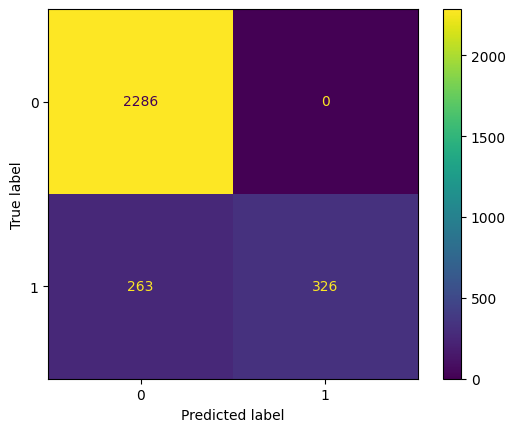

In [ ]:


parameters = {'n_neighbors':[2, 10],}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

#neigh.fit(X_train, y_train)
#predictions = neigh.predict(X_test)
#accuracy_score(y_test, predictions)
print(f"accuracy: {accuracy_score(y_test, predictions)}")
print(f"recall: {recall_score(y_test, predictions)}")
print(f"precision: {precision_score(y_test, predictions)}")

print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_)
print(clf.cv_results_['mean_test_score'])

cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Random Forest

accuracy: 0.9572173913043478
recall: 0.8081494057724957
precision: 0.9794238683127572
{'max_depth': 10}
0.9627826086956521
{'mean_fit_time': array([4.91104875, 4.33229752]), 'std_fit_time': array([1.12381403, 0.34658875]), 'mean_score_time': array([0.03239717, 0.02512507]), 'std_score_time': array([0.00855723, 0.00586655]), 'param_max_depth': masked_array(data=[9, 10],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 9}, {'max_depth': 10}], 'split0_test_score': array([0.96173913, 0.96463768]), 'split1_test_score': array([0.95942029, 0.96173913]), 'split2_test_score': array([0.96057971, 0.96231884]), 'split3_test_score': array([0.96      , 0.96405797]), 'split4_test_score': array([0.95942029, 0.96115942]), 'mean_test_score': array([0.96023188, 0.96278261]), 'std_test_score': array([0.00086763, 0.00134213]), 'rank_test_score': array([2, 1], dtype=int32)}
[0.96023188 0.96278261]


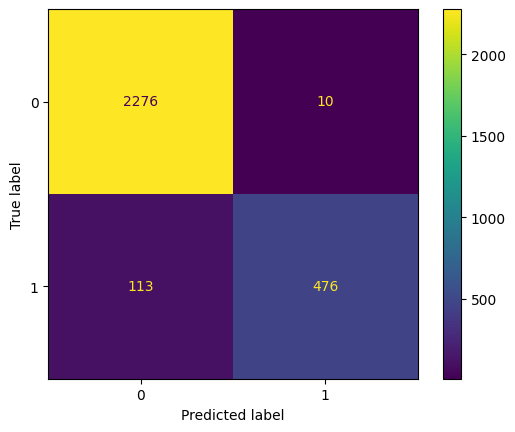

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[9, 10],}
rfc = RandomForestClassifier(random_state=2)
clf = GridSearchCV(rfc, parameters)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

#print(accuracy_score(y_test, predictions))
#print(rfc.predict(X_test))
print(f"accuracy: {accuracy_score(y_test, predictions)}")
print(f"recall: {recall_score(y_test, predictions)}")
print(f"precision: {precision_score(y_test, predictions)}")

print(clf.best_params_)
print(clf.best_score_)
print(clf.cv_results_)
print(clf.cv_results_['mean_test_score'])

cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Neural Network

accuracy: 0.8789565217391304
recall: 0.6943972835314092
precision: 0.708838821490468


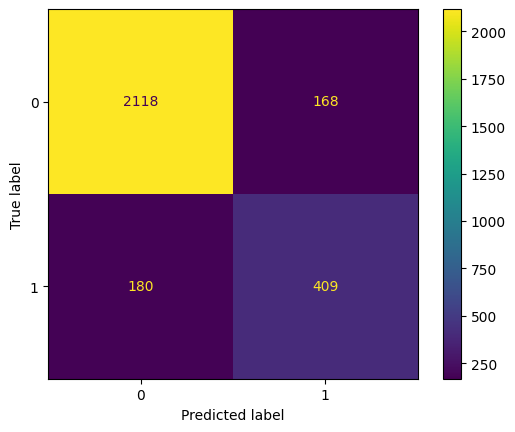

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, predictions)}")
print(f"recall: {recall_score(y_test, predictions)}")
print(f"precision: {precision_score(y_test, predictions)}")

cm = confusion_matrix(y_test, predictions, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()
plt.show()

## Support Vector Machine

accuracy: 0.9666086956521739
recall: 0.8675721561969439
precision: 0.9659735349716446


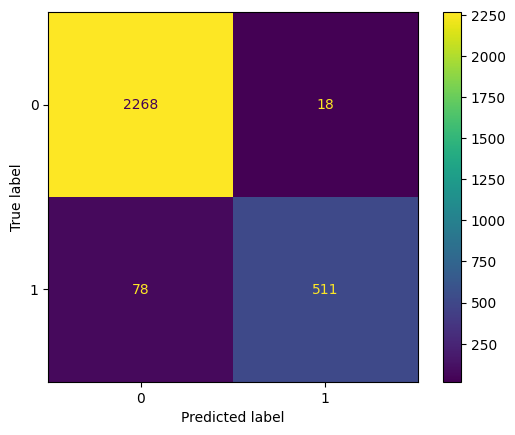

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
parameters = {'kernel':['linear'], 'C':[1, 2]}
svc = svm.SVC()
#clf = GridSearchCV(svc, parameters)
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)

print(f"accuracy: {accuracy_score(y_test, predictions)}")
print(f"recall: {recall_score(y_test, predictions)}")
print(f"precision: {precision_score(y_test, predictions)}")

cm = confusion_matrix(y_test, predictions, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()
plt.show()